In [1]:
import pandas as pd
import numpy as np 
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap, MarkerCluster, FeatureGroupSubGroup
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt

## Importation, exploration et statistique descriptive

In [2]:

# Lire le fichier CSV
df_u = pd.read_csv('US+Candy+Distributor//uszips.csv', dtype={'zip':str} ) # 
df_cs= pd.read_csv('US+Candy+Distributor//Candy_Sales.csv', ) #dtype={'Postal Code':str}
df_cp = pd.read_csv('US+Candy+Distributor//Candy_Products.csv')
df_ct = pd.read_csv('US+Candy+Distributor//Candy_Targets.csv')
df_cf = pd.read_csv('US+Candy+Distributor//Candy_Factories.csv')

In [3]:
df_cp

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [ ]:
df_cf

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371
2,Sugar Shack,48.119140,-96.181150
3,Secret Factory,41.446333,-90.565487
4,The Other Factory,35.117500,-89.971107


In [5]:
'02908' in df_cs['Postal Code'].tolist()

True

<h2 style="color:blue;">USZIPS <h4/> 

In [6]:
df_u.dtypes

zip                  object
lat                 float64
lng                 float64
city                 object
state_id             object
state_name           object
zcta                   bool
parent_zcta         float64
population          float64
density             float64
county_fips           int64
county_name          object
county_weights       object
county_names_all     object
county_fips_all      object
imprecise              bool
military               bool
timezone             object
dtype: object

In [ ]:
# header 
(df_u.head(2))

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,00601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16834.0,100.9,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,00602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37642.0,479.2,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico


In [ ]:
# Calculate and display the sum of null values for each column in the DataFrame df_u
(df_u.isnull().sum())

zip                     0
lat                     0
lng                     0
city                    0
state_id                0
state_name              0
zcta                    0
parent_zcta         33787
population             17
density                17
county_fips             0
county_name             0
county_weights          0
county_names_all        0
county_fips_all         0
imprecise               0
military                0
timezone                0
dtype: int64

In [ ]:
df_u.describe()

,lat,lng,parent_zcta,population,density,county_fips
count,33787.000000,33787.000000,0.0,33770.000000,33770.000000,33787.000000
mean,38.800843,-90.956464,NaN,9901.170092,510.054519,29989.620446
std,5.387652,15.666437,NaN,14908.642037,1944.753885,15504.744997
min,-14.219840,-176.629620,NaN,0.000000,0.000000,1001.000000
25%,35.363910,-97.226565,NaN,650.000000,7.300000,18057.000000
50%,39.476220,-88.184120,NaN,2657.000000,30.650000,30031.000000
75%,42.103845,-80.237865,NaN,13329.000000,268.775000,42055.000000
max,71.274340,145.753490,NaN,134008.000000,60879.200000,78030.000000


<h2 style="color:blue;">Candy sales <h4/> 

In [10]:
(df_cs.dtypes)


Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID         int64
Country/Region     object
City               object
State/Province     object
Postal Code        object
Division           object
Region             object
Product ID         object
Product Name       object
Sales             float64
Units               int64
Gross Profit      float64
Cost              float64
dtype: object

In [11]:
df_cs.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.5,2,4.9,2.6
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.2,2,5.0,2.2


In [12]:
(df_cs.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Division          0
Region            0
Product ID        0
Product Name      0
Sales             0
Units             0
Gross Profit      0
Cost              0
dtype: int64

In [13]:
df_cs = df_cs.drop_duplicates(subset=['Order ID'])

In [ ]:
df_cs.describe()

,Row ID,Customer ID,Sales,Units,Gross Profit,Cost
count,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,5105.205053,134483.207276,13.976430,3.787577,9.177444,4.798986
std,2938.432348,20200.423886,11.806604,2.229630,6.836159,5.354009
min,1.000000,100006.000000,1.250000,1.000000,0.250000,0.600000
25%,2553.000000,117394.000000,7.200000,2.000000,4.900000,2.400000
50%,5114.000000,133648.000000,10.800000,3.000000,7.470000,3.600000
75%,7646.000000,152072.000000,18.000000,5.000000,12.250000,5.700000
max,10194.000000,192314.000000,260.000000,14.000000,130.000000,130.000000


In [15]:
# Convertir les colonnes de dates en format datetime
df_cs['Order Date'] = pd.to_datetime(df_cs['Order Date'])
df_cs['Ship Date'] = pd.to_datetime(df_cs['Ship Date'])

In [16]:
print(df_cs.columns)
print(df_cs.dtypes)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name',
       'Sales', 'Units', 'Gross Profit', 'Cost'],
      dtype='object')
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID                int64
Country/Region            object
City                      object
State/Province            object
Postal Code               object
Division                  object
Region                    object
Product ID                object
Product Name              object
Sales                    float64
Units                      int64
Gross Profit             float64
Cost                     float64
dtype: object


<h2 style="color:blue;">Candy Product <h4/> 

In [17]:
(df_cp.dtypes)


Division         object
Product Name     object
Factory          object
Product ID       object
Unit Price      float64
Unit Cost       float64
dtype: object

In [18]:
df_cp.head(2)


,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.2


In [19]:
(df_cp.isnull().sum())

Division        0
Product Name    0
Factory         0
Product ID      0
Unit Price      0
Unit Cost       0
dtype: int64

In [ ]:
df_cp.describe()

,Unit Price,Unit Cost
count,15.000000,15.000000
mean,4.462000,1.806000
std,4.790102,2.344866
min,1.250000,0.600000
25%,1.745000,0.850000
50%,3.490000,1.100000
75%,3.750000,1.400000
max,20.000000,10.000000


<h2 style="color:blue;">Candy Targets <h4/> 

In [ ]:
(df_ct.dtypes)

Division    object
Target       int64
dtype: object

In [ ]:
df_ct.head(2)


,Division,Target
0,Chocolate,27000
1,Sugar,15000


In [ ]:
(df_ct.isnull().sum())

Division    0
Target      0
dtype: int64

In [ ]:
df_ct.describe()

,Target
count,3.0
mean,15000.0
std,12000.0
min,3000.0
25%,9000.0
50%,15000.0
75%,21000.0
max,27000.0


<h2 style="color:blue;">Factory <h4/> 

In [25]:
(df_cf.dtypes)

Factory       object
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
df_cf.head(2)

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371


In [27]:
(df_cf.isnull().sum())

Factory      0
Latitude     0
Longitude    0
dtype: int64

In [ ]:
df_cf.describe()

,Latitude,Longitude
count,5.000000,5.000000
mean,37.928208,-93.914830
std,6.779453,11.348593
min,32.076176,-111.768036
25%,32.881893,-96.181150
50%,35.117500,-90.565487
75%,41.446333,-89.971107
max,48.119140,-81.088371


<h2 style="color:green;">Jointure des bases uszips et sales<h4/> 

In [29]:
# Convertir les colonnes 'Postal Code' et 'zip' en type string
df_cs['Postal Code'] = df_cs['Postal Code'].astype(str)
df_u['zip'] = df_u['zip'].astype(str)   

In [30]:
len(df_cs)

8549

In [31]:
df_cs['Postal Code'].dtype

dtype('O')

In [32]:
df_u['zip'].dtype

dtype('O')

In [ ]:
df_u[df_u['zip'] == "02908"]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
744,02908,41.83877,-71.43926,Providence,RI,Rhode Island,True,NaN,39099.0,4437.3,44007,Providence,"{""44007"": 100}",Providence,44007,False,False,America/New_York


In [34]:
df_su = pd.merge(df_cs, df_u, left_on='Postal Code', right_on='zip', how='left')

In [ ]:
df_su.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8389.000000,8389.000000,0.0,8389.000000,8389.000000,8389.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.782249,-94.453055,NaN,50418.293599,5132.085481,27808.097628
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.010370,-117.251040,NaN,38595.000000,923.700000,8069.000000
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.750340,-87.922680,NaN,50207.000000,1934.000000,33013.000000
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.498330,NaN,59453.000000,5623.100000,42101.000000
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,48.800640,-68.846540,NaN,134008.000000,36572.900000,56021.000000
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,4.895053,18.067022,NaN,14130.204386,7889.757851,17027.880870


In [ ]:
df_su[df_su['Order ID'].duplicated()].describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips
count,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_su.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,...,59453.0,7047.4,6075.0,San Francisco,"{""06075"": 100}",San Francisco,06075,False,False,America/Los_Angeles
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,...,59453.0,7047.4,6075.0,San Francisco,"{""06075"": 100}",San Francisco,06075,False,False,America/Los_Angeles


In [38]:
df_su[ df_su['zip'].isnull() ]['Postal Code'].unique()

array(['V5K', 'M2N', 'H1C', 'H1A', 'M3C', 'G1B', 'V6Z', 'M5H', 'H1B',
       'V6G', 'T1Y', 'T5A', 'C0A', 'R0H', 'V6E', 'A0A', 'M7A', 'E1A',
       'B3H', 'T2C', 'S0G', 'V6B', 'R3R'], dtype=object)

In [39]:
postal_codes_coords = {
    'V5K': {'latitude': 49.2827, 'longitude': -123.1207},  # Vancouver, BC
    'M2N': {'latitude': 43.7615, 'longitude': -79.4111},   # Toronto, ON
    'H1C': {'latitude': 45.6504, 'longitude': -73.5415},   # Montreal, QC
    'H1A': {'latitude': 45.6503, 'longitude': -73.5498},   # Montreal, QC
    'M3C': {'latitude': 43.7259, 'longitude': -79.3409},   # Toronto, ON
    'G1B': {'latitude': 46.8033, 'longitude': -71.2428},   # Quebec City, QC
    'V6Z': {'latitude': 49.2746, 'longitude': -123.1219},  # Vancouver, BC
    'M5H': {'latitude': 43.6500, 'longitude': -79.3807},   # Toronto, ON
    'H1B': {'latitude': 45.6321, 'longitude': -73.5101},   # Montreal, QC
    'V6G': {'latitude': 49.2917, 'longitude': -123.1372},  # Vancouver, BC
    'T1Y': {'latitude': 51.0624, 'longitude': -113.9791},  # Calgary, AB
    'T5A': {'latitude': 53.5706, 'longitude': -113.4068},  # Edmonton, AB
    'C0A': {'latitude': 46.2382, 'longitude': -63.1311},   # Prince Edward Island
    'R0H': {'latitude': 50.0736, 'longitude': -98.2985},   # Manitoba
    'V6E': {'latitude': 49.2856, 'longitude': -123.1267},  # Vancouver, BC
    'A0A': {'latitude': 47.5615, 'longitude': -53.2687},   # Newfoundland and Labrador
    'M7A': {'latitude': 43.6532, 'longitude': -79.3832},   # Ontario Legislature, Toronto
    'E1A': {'latitude': 46.0887, 'longitude': -64.7782},   # Moncton, NB
    'B3H': {'latitude': 44.6366, 'longitude': -63.5917},   # Halifax, NS
    'T2C': {'latitude': 50.9806, 'longitude': -114.0104},  # Calgary, AB
    'S0G': {'latitude': 50.4488, 'longitude': -104.6189},  # Saskatchewan
    'V6B': {'latitude': 49.2820, 'longitude': -123.1080},  # Vancouver, BC
    'R3R': {'latitude': 49.8776, 'longitude': -97.2443},   # Winnipeg, MB
}

def update_coords(row):
    postal_code = row['Postal Code']
    if postal_code in postal_codes_coords:
        row['lat'] = postal_codes_coords[postal_code]['latitude']
        row['lng'] = postal_codes_coords[postal_code]['longitude']
    return row

In [40]:
df_su = df_su.apply(update_coords, axis=1)

In [ ]:
df_su[ df_su['lat'].isnull() ].head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone


In [ ]:
df_su.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Country/Region         0
City                   0
State/Province         0
Postal Code            0
Division               0
Region                 0
Product ID             0
Product Name           0
Sales                  0
Units                  0
Gross Profit           0
Cost                   0
zip                  160
lat                    0
lng                    0
city                 160
state_id             160
state_name           160
zcta                 160
parent_zcta         8549
population           160
density              160
county_fips          160
county_name          160
county_weights       160
county_names_all     160
county_fips_all      160
imprecise            160
military             160
timezone             160
dtype: int64

In [43]:
df_su = df_su.dropna(subset=['lat'])

In [ ]:
df_su.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,0.0,8389.000000,8389.000000,8389.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.952745,-94.311681,NaN,50418.293599,5132.085481,27808.097628
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.027770,-117.251040,NaN,38595.000000,923.700000,8069.000000
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.894970,-87.729430,NaN,50207.000000,1934.000000,33013.000000
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.379270,NaN,59453.000000,5623.100000,42101.000000
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,53.570600,-53.268700,NaN,134008.000000,36572.900000,56021.000000
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,5.018588,18.164505,NaN,14130.204386,7889.757851,17027.880870


In [ ]:
df_su[df_su['Division'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone


In [46]:
df_su.to_csv(r'US+Candy+Distributor/df_su_cleaned.csv', index=False)

In [47]:
df_su.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name',
       'Sales', 'Units', 'Gross Profit', 'Cost', 'zip', 'lat', 'lng', 'city',
       'state_id', 'state_name', 'zcta', 'parent_zcta', 'population',
       'density', 'county_fips', 'county_name', 'county_weights',
       'county_names_all', 'county_fips_all', 'imprecise', 'military',
       'timezone'],
      dtype='object')

In [48]:
df_su.dtypes

Row ID                       int64
Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Ship Mode                   object
Customer ID                  int64
Country/Region              object
City                        object
State/Province              object
Postal Code                 object
Division                    object
Region                      object
Product ID                  object
Product Name                object
Sales                      float64
Units                        int64
Gross Profit               float64
Cost                       float64
zip                         object
lat                        float64
lng                        float64
city                        object
state_id                    object
state_name                  object
zcta                        object
parent_zcta                float64
population                 float64
density                    float64
county_fips         

In [49]:
df_su.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,0.0,8389.000000,8389.000000,8389.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.952745,-94.311681,NaN,50418.293599,5132.085481,27808.097628
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.027770,-117.251040,NaN,38595.000000,923.700000,8069.000000
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.894970,-87.729430,NaN,50207.000000,1934.000000,33013.000000
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.379270,NaN,59453.000000,5623.100000,42101.000000
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,53.570600,-53.268700,NaN,134008.000000,36572.900000,56021.000000
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,5.018588,18.164505,NaN,14130.204386,7889.757851,17027.880870


In [50]:
df_merged_1 = pd.merge(df_su, df_cp[['Product ID', 'Factory', 'Unit Cost',]], on='Product ID', how='inner')
df_merged_1.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips,Unit Cost
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,0.0,8389.000000,8389.000000,8389.000000,8549.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.952745,-94.311681,NaN,50418.293599,5132.085481,27808.097628,1.256828
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000,0.600000
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.027770,-117.251040,NaN,38595.000000,923.700000,8069.000000,1.100000
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.894970,-87.729430,NaN,50207.000000,1934.000000,33013.000000,1.140000
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.379270,NaN,59453.000000,5623.100000,42101.000000,1.200000
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,53.570600,-53.268700,NaN,134008.000000,36572.900000,56021.000000,10.000000
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,5.018588,18.164505,NaN,14130.204386,7889.757851,17027.880870,0.939962


In [51]:
df_merged_1.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Country/Region         0
City                   0
State/Province         0
Postal Code            0
Division               0
Region                 0
Product ID             0
Product Name           0
Sales                  0
Units                  0
Gross Profit           0
Cost                   0
zip                  160
lat                    0
lng                    0
city                 160
state_id             160
state_name           160
zcta                 160
parent_zcta         8549
population           160
density              160
county_fips          160
county_name          160
county_weights       160
county_names_all     160
county_fips_all      160
imprecise            160
military             160
timezone             160
Factory                0
Unit Cost              0
dtype: int64

In [52]:
# Deuxième jointure : ajouter les colonnes "Latitude" et "Longitude" en utilisant "Factory"
df_merged_2 = pd.merge(df_merged_1, df_cf[['Factory', 'Latitude', 'Longitude']], on='Factory', how='inner') 
df_merged_2.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips,Unit Cost,Latitude,Longitude
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,0.0,8389.000000,8389.000000,8389.000000,8549.000000,8549.000000,8549.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.952745,-94.311681,NaN,50418.293599,5132.085481,27808.097628,1.256828,32.855042,-98.566719
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000,0.600000,32.076176,-111.768036
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.027770,-117.251040,NaN,38595.000000,923.700000,8069.000000,1.100000,32.076176,-111.768036
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.894970,-87.729430,NaN,50207.000000,1934.000000,33013.000000,1.140000,32.881893,-111.768036
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.379270,NaN,59453.000000,5623.100000,42101.000000,1.200000,32.881893,-81.088371
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,53.570600,-53.268700,NaN,134008.000000,36572.900000,56021.000000,10.000000,48.119140,-81.088371
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,5.018588,18.164505,NaN,14130.204386,7889.757851,17027.880870,0.939962,1.744208,14.920765


In [53]:
# Sélectionner les colonnes spécifiques, y compris 'Country/Region'
columns_to_keep = ['Customer ID', 'State/Province', 'Postal Code', 'lat', 'lng', 'population', 'density', 'Product ID', 'Factory', 'Latitude', 'Longitude','Country/Region', 'Units', 'Unit Cost']
#df_selected = df_merged_2[columns_to_keep]
df_selected = df_merged_2



In [54]:
df_selected

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,...,county_weights,county_names_all,county_fips_all,imprecise,military,timezone,Factory,Unit Cost,Latitude,Longitude
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,...,"{""06075"": 100}",San Francisco,06075,False,False,America/Los_Angeles,Wicked Choccy's,1.30,32.076176,-81.088371
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,...,"{""06075"": 100}",San Francisco,06075,False,False,America/Los_Angeles,Lot's O' Nuts,1.10,32.881893,-111.768036
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,...,"{""36061"": 100}",New York,36061,False,False,America/New_York,Lot's O' Nuts,1.20,32.881893,-111.768036
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,...,"{""36061"": 100}",New York,36061,False,False,America/New_York,Wicked Choccy's,1.14,32.076176,-81.088371
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,...,"{""06075"": 100}",San Francisco,06075,False,False,America/Los_Angeles,Wicked Choccy's,1.14,32.076176,-81.088371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,4544,US-2023-167682-CHO-MIL-31000,2023-04-03,2028-09-29,Standard Class,167682,United States,Richmond,Indiana,47374,...,"{""18177"": 98.86, ""18161"": 1.14}",Wayne|Union,18177|18161,False,False,America/Indiana/Indianapolis,Wicked Choccy's,1.14,32.076176,-81.088371
8545,4547,US-2023-167682-CHO-SCR-58000,2023-04-03,2028-09-29,Standard Class,167682,United States,Richmond,Indiana,47374,...,"{""18177"": 98.86, ""18161"": 1.14}",Wayne|Union,18177|18161,False,False,America/Indiana/Indianapolis,Lot's O' Nuts,1.10,32.881893,-111.768036
8546,4724,US-2023-147991-CHO-NUT-13000,2023-05-05,2028-10-29,Standard Class,147991,United States,Chattanooga,Tennessee,37421,...,"{""47065"": 100}",Hamilton,47065,False,False,America/New_York,Lot's O' Nuts,1.00,32.881893,-111.768036
8547,5175,US-2023-152471-CHO-TRI-54000,2023-07-08,2028-12-28,Same Day,152471,United States,Jacksonville,Florida,32216,...,"{""12031"": 100}",Duval,12031,False,False,America/New_York,Wicked Choccy's,1.30,32.076176,-81.088371


# Calcule de la distance client usine

In [55]:
# Fonction pour calculer la distance haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en kilomètres
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [56]:
# Calculer la distance et ajouter une nouvelle colonne "distances"
df_selected['distances'] = df_selected.apply(lambda row: haversine(row['lat'], row['lng'], row['Latitude'], row['Longitude']), axis=1)

In [ ]:
df_selected.describe()

,Row ID,Order Date,Ship Date,Customer ID,Sales,Units,Gross Profit,Cost,lat,lng,parent_zcta,population,density,county_fips,Unit Cost,Latitude,Longitude,distances
count,8549.000000,8549,8549,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,0.0,8389.000000,8389.000000,8389.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,5105.205053,2023-05-01 07:05:49.093460992,2028-10-25 06:12:45.563223808,134483.207276,13.976430,3.787577,9.177444,4.798986,37.952745,-94.311681,NaN,50418.293599,5132.085481,27808.097628,1.256828,32.855042,-98.566719,2006.966531
min,1.000000,2021-01-03 00:00:00,2026-06-30 00:00:00,100006.000000,1.250000,1.000000,0.250000,0.600000,25.484800,-123.167000,NaN,24991.000000,8.100000,1077.000000,0.600000,32.076176,-111.768036,17.588002
25%,2553.000000,2022-05-15 00:00:00,2027-11-11 00:00:00,117394.000000,7.200000,2.000000,4.900000,2.400000,34.027770,-117.251040,NaN,38595.000000,923.700000,8069.000000,1.100000,32.076176,-111.768036,1108.937209
50%,5114.000000,2023-06-26 00:00:00,2028-12-21 00:00:00,133648.000000,10.800000,3.000000,7.470000,3.600000,38.894970,-87.729430,NaN,50207.000000,1934.000000,33013.000000,1.140000,32.881893,-111.768036,1712.973727
75%,7646.000000,2024-05-14 00:00:00,2029-11-08 00:00:00,152072.000000,18.000000,5.000000,12.250000,5.700000,40.795380,-77.379270,NaN,59453.000000,5623.100000,42101.000000,1.200000,32.881893,-81.088371,3157.593833
max,10194.000000,2024-12-30 00:00:00,2030-06-28 00:00:00,192314.000000,260.000000,14.000000,130.000000,130.000000,53.570600,-53.268700,NaN,134008.000000,36572.900000,56021.000000,10.000000,48.119140,-81.088371,5096.252710
std,2938.432348,NaN,NaN,20200.423886,11.806604,2.229630,6.836159,5.354009,5.018588,18.164505,NaN,14130.204386,7889.757851,17027.880870,0.939962,1.744208,14.920765,1104.133363


In [58]:

# Créer une carte de base centrée sur les États-Unis
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Ajouter un cluster de marqueurs pour les clients
marker_cluster = MarkerCluster().add_to(m)

In [59]:
# Ajouter des marqueurs pour chaque client
for idx, row in df_selected.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Customer ID: {row['Customer ID']}<br>State/Province: {row['State/Province']}<br>Distance: {row['distances']} km",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)


In [60]:
factories = df_selected[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
for idx, row in factories.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Factory: {row['Factory']}",
        icon=folium.Icon(color='red', icon='industry')
    ).add_to(m)

In [61]:
# Ajouter une légende à la carte
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.8;">
 <b>Légende</b><br>
 <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Clients<br>
 <i class="fa fa-industry fa-2x" style="color:red"></i> Usines
</div>
'''

In [62]:
m.get_root().html.add_child(folium.Element(legend_html))

In [64]:
m.save('html/map.html')

In [64]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Exemple de données (client, usine) avec les distances entre eux
data = {
    "client_lat": [34.0522, 40.7128, 41.8781, 29.7604],  # Latitude des clients
    "client_lon": [-118.2437, -74.0060, -87.6298, -95.3698],  # Longitude des clients
    "distance": [10, 15, 8, 20]  # Distance entre l'usine et le client
}

# Charger les données dans un DataFrame
df = pd.DataFrame(data)

# Créer une carte centrée sur les États-Unis
map_center = [39.8283, -98.5795]  # Latitude et Longitude du centre des USA
m = folium.Map(location=map_center, zoom_start=5)

# Préparer les données pour la HeatMap (sous forme de liste de points [latitude, longitude, poids])
heat_data = [[row["client_lat"], row["client_lon"], row["distance"]] for index, row in df.iterrows()]

# Ajouter la HeatMap à la carte
HeatMap(heat_data).add_to(m)

# Afficher la carte
m.save("heatmap.html")


In [65]:
import folium
from folium.plugins import HeatMap, MarkerCluster, FeatureGroupSubGroup
import pandas as pd

# Exemple de données (client, usine) avec les distances entre eux
data = {
    "client_lat": [34.0522, 40.7128, 41.8781, 29.7604],  # Latitude des clients
    "client_lon": [-118.2437, -74.0060, -87.6298, -95.3698],  # Longitude des clients
    "distance": [10, 15, 8, 20],  # Distance entre l'usine et le client
    "city": ["Los Angeles", "New York", "Chicago", "Houston"]  # Noms des villes
}

# Charger les données dans un DataFrame
df = pd.DataFrame(data)

# Créer une carte centrée sur les États-Unis avec un style différent
map_center = [39.8283, -98.5795]  # Latitude et Longitude du centre des USA
m = folium.Map(location=map_center, zoom_start=5,)

# Créer des groupes de calques
marker_cluster = MarkerCluster(name="Clients").add_to(m)
heat_layer = FeatureGroupSubGroup(marker_cluster, name="Heat Map")
m.add_child(heat_layer)

# Ajouter des marqueurs pour chaque client avec des popups
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['client_lat'], row['client_lon']],
        radius=10,
        popup=f"City: {row['city']}<br>Distance: {row['distance']} km",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(marker_cluster)

# Préparer les données pour la HeatMap
heat_data = [[row["client_lat"], row["client_lon"], row["distance"]] for index, row in df.iterrows()]

# Ajouter la HeatMap avec des paramètres personnalisés
HeatMap(heat_data, 
        min_opacity=0.3,
        max_val=max(data['distance']),
        radius=25, 
        blur=15, 
        gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
).add_to(heat_layer)

# Ajouter un contrôle de calques
folium.LayerControl().add_to(m)

# Afficher la carte
m.save("enhanced_heatmap.html")

/tmp/ipykernel_2755/809836962.py:40: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


AttributeError: 'float' object has no attribute 'split'

/tmp/ipykernel_2755/2819281345.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


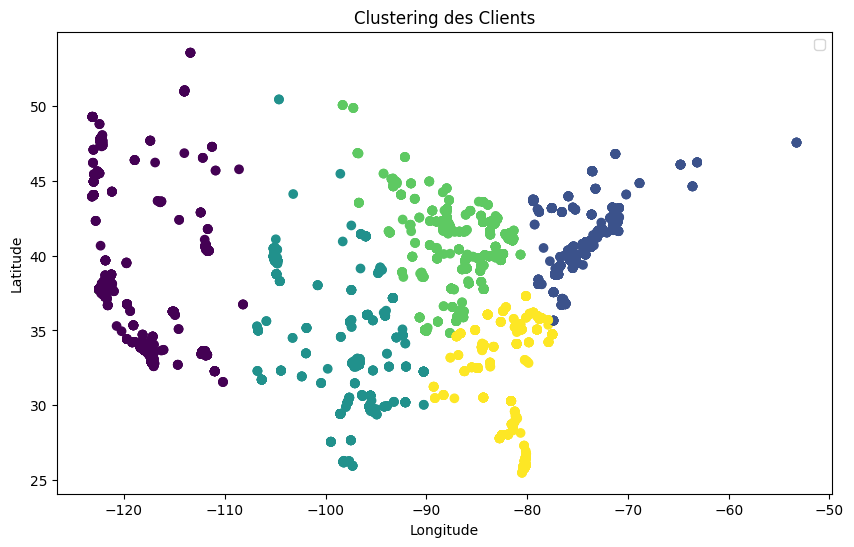

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extraire les coordonnées des clients
coords = df_selected[['lat', 'lng']]

# Appliquer K-means pour regrouper les clients
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df_selected['Cluster'] = kmeans.labels_

#Disribution distance clients_usine
plt.figure(figsize=(10, 6))

# Visualiser les clusters
plt.scatter(df_selected['lng'], df_selected['lat'], c=df_selected['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering des Clients')
plt.legend()
plt.show()

## Distribution des clients de Candy 

In [67]:
# Créer une carte centrée sur les États-Unis avec un style différent
map_center = [39.8283, -98.5795]  # Latitude et Longitude du centre des USA
m = folium.Map(location=map_center, zoom_start=4,)

# Créer des groupes de calques
marker_cluster = MarkerCluster(name="Factories", show=False).add_to(m)
heat_cluster = MarkerCluster(name="Heat cluster").add_to(m)
heat_layer = FeatureGroupSubGroup(heat_cluster, name="Heat Map")
m.add_child(heat_layer) ; 


In [68]:
# for idx, row in df_selected.iterrows():
#     folium.CircleMarker(
#         location=[row['lat'], row['lng']],
#         radius=2,
#         popup=f"Customer ID: {row['Customer ID']}<br>Distance: {row['distances']} km <br> Facrory : {row['Factory']}",
#         color='red',
#         fill=True,
#         fill_color='red'
#     ).add_to(marker_cluster)


factories = df_selected[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
for idx, row in factories.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Factory: {row['Factory']}",
        icon=folium.Icon(color='red', icon='industry')
    ).add_to(marker_cluster)


heat_data = [[row["lat"], row["lng"], row["distances"]] for index, row in df_selected.iterrows()]

HeatMap(heat_data, 
        min_opacity=0.3,
        max_val=max(df_selected['distances']),
        radius=25, 
        blur=15, 
        gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
).add_to(heat_layer) ; 

/tmp/ipykernel_2755/684193457.py:23: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


In [69]:
folium.LayerControl().add_to(m)
m.save('heatmap.html')

AttributeError: 'float' object has no attribute 'split'

<h1 style="color: blue;">Dispersion des clients pour chaque usine<h1/>

In [86]:
# Créer la carte centrée sur la région
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)

for fact in df_selected['Factory'].unique().tolist() : 

    companyFeatureGroup = folium.FeatureGroup(name = fact , show=False)
    marker_cluster = MarkerCluster(name=f'{fact} - Clients', show=False)


    df = df_selected[ df_selected['Factory'] == fact ]

    factories = df[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
    # factories
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Factory - {row['Factory']}"
        ).add_to(companyFeatureGroup)

    # all row
    for _, row in df.iterrows(): 
        folium.Marker(
            location=[row["lat"], row["lng"]],
            icon=folium.Icon(color="blue", icon="user", prefix="fa"),
            popup=f"Client - {row['Factory']}"
        ).add_to(marker_cluster)


        folium.PolyLine(
            locations=[
                [latitude , longitude] ,  
                [row["lat"], row["lng"]]
            ],
            color='black' ,
            weight=0.5,
            opacity=0.5,
        ).add_to(companyFeatureGroup)
    
    companyFeatureGroup.add_to(m)
    marker_cluster.add_to(m)

# Ajouter le contrôle des calques
folium.LayerControl().add_to(m)
m.save("heatmap_route.html") ;

<h1 style="color: blue;">Dispersion des clients pour chaque Produits<h1/>

In [66]:
df_selected['Latitude']

0       32.076176
1       32.881893
2       32.881893
3       32.076176
4       32.076176
          ...    
8544    32.076176
8545    32.881893
8546    32.881893
8547    32.076176
8548    32.881893
Name: Latitude, Length: 8549, dtype: float64

"['Sugar Shack']"

In [74]:
# Créer la carte centrée sur la région
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)

for fact in df_selected['Product Name'].unique().tolist() : 

    f = df_selected[df_selected['Product Name'] == fact]['Factory'].unique().__str__()
    companyFeatureGroup = folium.FeatureGroup(name = fact , show=False)
    marker_cluster = MarkerCluster(name=f'{fact} - Clients - {f}', show=False)


    df = df_selected[ df_selected['Product Name'] == fact ]

    factories = df[['Product Name', 'Latitude', 'Longitude', 'Factory']].drop_duplicates()
    # factories
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Product Name - {row['Product Name']}"
        ).add_to(companyFeatureGroup)

    # all row
    for _, row in df.iterrows(): 
        folium.Marker(
            location=[row["lat"], row["lng"]],
            icon=folium.Icon(color="blue", icon="user", prefix="fa"),
            popup=f"Client - {row['Product Name'] } - {row['Factory']}"
        ).add_to(marker_cluster)


        folium.PolyLine(
            locations=[
                [latitude , longitude] ,  
                [row["lat"], row["lng"]]
            ],
            color='black' ,
            weight=0.5,
            opacity=0.5,
        ).add_to(companyFeatureGroup)
    
    companyFeatureGroup.add_to(m)
    marker_cluster.add_to(m)

# Ajouter le contrôle des calques
folium.LayerControl().add_to(m)
m.save("heatmap_route_product_name.html") ;

In [69]:
# Créer la carte centrée sur la région
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)

In [70]:
for fact in df_selected['Factory'].unique().tolist() : 

    heat_cluster = MarkerCluster(name=fact).add_to(m)
    # heat_layer = FeatureGroupSubGroup(heat_cluster, name=fact + "Heat Map")
    # m.add_child(heat_layer) ;

    df = df_selected[ df_selected['Factory'] == fact ]

    factories = df[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
    # factories
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Factory - {row['Factory']}"
        ).add_to(heat_cluster)

    # all row
    heat_data = [
        [row['lat'] , row['lng'] , row['distances']] for index, row in df.iterrows()
    ]

    HeatMap(heat_data, 
        min_opacity=0.3,
        max_val=max(df_selected['distances']),
        radius=25, 
        blur=15, 
        gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
        ).add_to(heat_cluster) ; 

folium.LayerControl().add_to(m)
m.save('heatmap_client_usine.html')

C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\2152942149.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\2152942149.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\2152942149.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\2152942149.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\2152942149.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(h

AttributeError: 'float' object has no attribute 'split'

In [84]:
# Créer la carte centrée sur la région
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)


for fact in df_selected['Factory'].unique().tolist() : 

    heat_cluster = MarkerCluster(name=fact).add_to(m)
    # heat_layer = FeatureGroupSubGroup(heat_cluster, name=fact + "Heat Map")
    # m.add_child(heat_layer) ;

    df = df_selected[ df_selected['Factory'] == fact ]

    factories = df[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
    # factories
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Factory - {row['Factory']}"
        ).add_to(heat_cluster)

    # all row
    heat_data = [
        [row['lat'] , row['lng'] , row['Units']] for index, row in df.iterrows()
    ]

    HeatMap(heat_data, 
        min_opacity=0.3,
        max_val=max(df_selected['Units']),
        radius=25, 
        blur=15, 
        gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
        ).add_to(heat_cluster) ; 

folium.LayerControl().add_to(m)
m.save('heatmap_client_usine_ventes.html')

C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\557508700.py:30: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\557508700.py:30: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\557508700.py:30: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\557508700.py:30: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\557508700.py:30: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_d

AttributeError: 'float' object has no attribute 'split'

## Analyse de la correlation entre distance et cout d'expedition 

Il serait interssant de faire un tableur de correlation entre la distance et cout d'expedition, mais grace a un bar plot on peut opbserver tre clairement, que le cout ne change pas , quelque soit le ship mode pour chaque produit. 

In [ ]:
data_ = pd.read_csv('US+Candy+Distributor/profit-shipMode.csv')
wonka = data_[data_['Product-Name'] == 'Wonka Bar - Nutty Crunch Surprise']
wonka


,Unnamed: 0,Ship-Mode,Product-Name,Profit
0,0,First Class,Wonka Bar - Nutty Crunch Surprise,2.49
15,15,Second Class,Wonka Bar - Nutty Crunch Surprise,2.49
30,30,Standard Class,Wonka Bar - Nutty Crunch Surprise,2.49
45,45,Same Day,Wonka Bar - Nutty Crunch Surprise,2.49


<AxesSubplot: ylabel='Profit'>

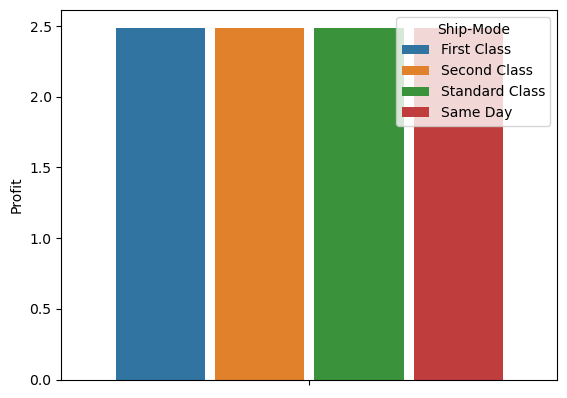

In [ ]:
sns.barplot(
    data=wonka, 
    y='Profit',
    hue='Ship-Mode',
    width=0.8, 
    gap=0.1
)

In [ ]:
df_selected.describe()

,Customer ID,lat,lng,population,density,Latitude,Longitude,Units,Unit Cost,distances,Cluster
count,10194.000000,10194.000000,10194.000000,9994.000000,9994.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,134468.961154,37.962579,-94.190349,50389.189914,5139.433220,32.807294,-98.556639,3.791838,1.241719,2008.978726,1.627722
std,20231.483007,5.008307,18.144549,14100.197948,7891.239444,1.618987,14.962083,2.228317,0.871623,1104.122970,1.322448
min,100006.000000,25.484800,-123.167000,24991.000000,8.100000,32.076176,-111.768036,1.000000,0.600000,17.588002,0.000000
25%,117212.000000,34.067380,-117.174820,38595.000000,939.500000,32.076176,-111.768036,2.000000,1.100000,1106.316050,0.000000
50%,133550.000000,38.938220,-87.717530,50207.000000,1934.000000,32.881893,-111.768036,3.000000,1.140000,1723.232478,1.000000
75%,152051.000000,40.795380,-77.234510,59453.000000,5623.100000,32.881893,-81.088371,5.000000,1.200000,3157.593833,3.000000
max,192314.000000,53.570600,-53.268700,134008.000000,36572.900000,48.119140,-81.088371,14.000000,10.000000,5096.252710,4.000000


<AxesSubplot: xlabel='Units', ylabel='distances'>

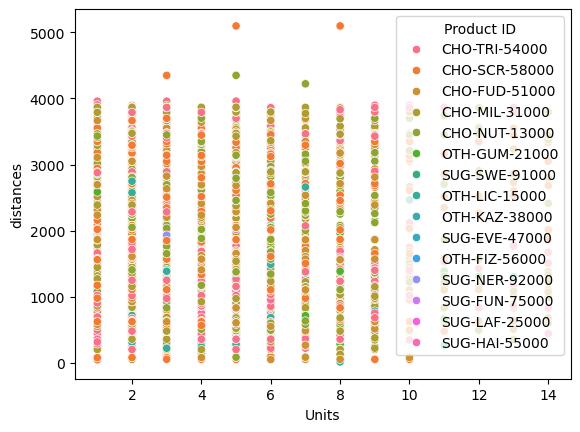

In [ ]:
sns.scatterplot(
    data=df_selected ,
    x='Units',
    y='distances', 
    hue='Product ID'
)

In [ ]:
# le produit que ce vent le plus 
# qui ce vent le moins, 
# pourqoi il ce vend le plus ou le mois , 
# comparer les cout 
# voir si un meme clients prend plusieurs different produit et lesques ? 
# regarder si certain produit on un ship mode plus utiiser 
# le mode de livraison le plus utiliser 

In [ ]:
df_cp

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [ ]:
df_cp.describe()

,Unit Price,Unit Cost
count,15.000000,15.000000
mean,4.462000,1.806000
std,4.790102,2.344866
min,1.250000,0.600000
25%,1.745000,0.850000
50%,3.490000,1.100000
75%,3.750000,1.400000
max,20.000000,10.000000


In [ ]:
## le produit le plus chere 
df_cp[df_cp['Unit Price'] == 20]

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
12,Other,Lickable Wallpaper,Secret Factory,OTH-LIC-15000,20.0,10.0


In [ ]:
#mois chere
df_cp[df_cp['Unit Price'] == 1.25]

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
13,Other,Wonka Gum,Secret Factory,OTH-GUM-21000,1.25,0.6


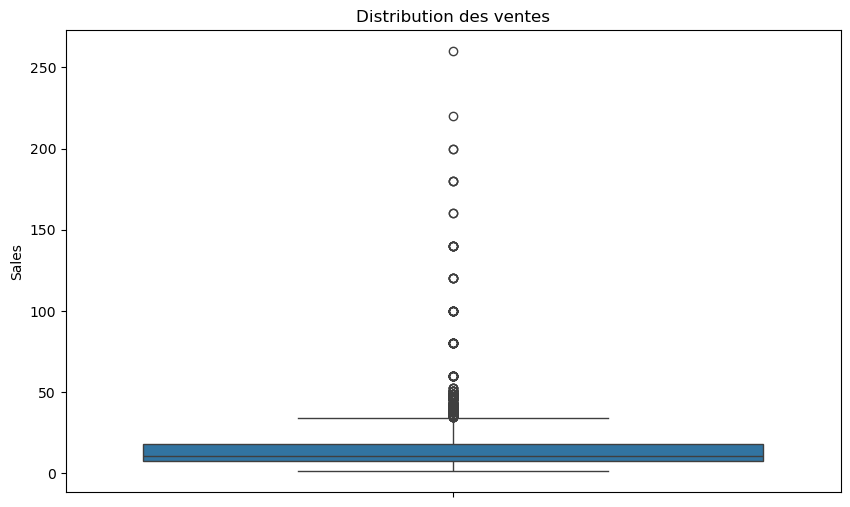

In [ ]:
# Création d'un boxplot simple
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_su, y='Sales')
plt.title('Distribution des ventes')
plt.show()

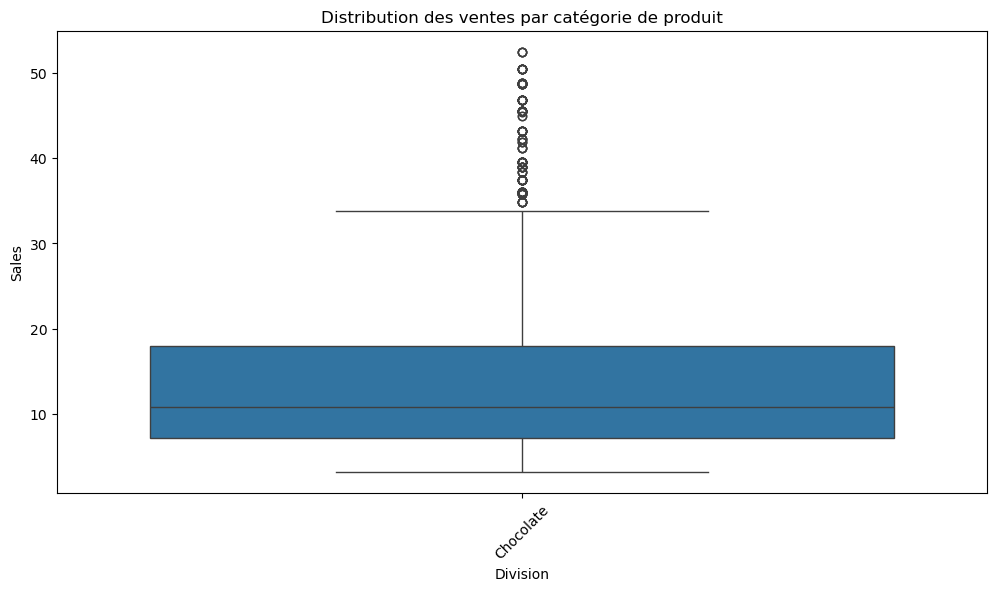

In [ ]:
# Boxplot comparatif par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_su[df_su['Division'] == 'Chocolate'], x='Division', y='Sales')
plt.xticks(rotation=45)
plt.title('Distribution des ventes par catégorie de produit')
plt.show()

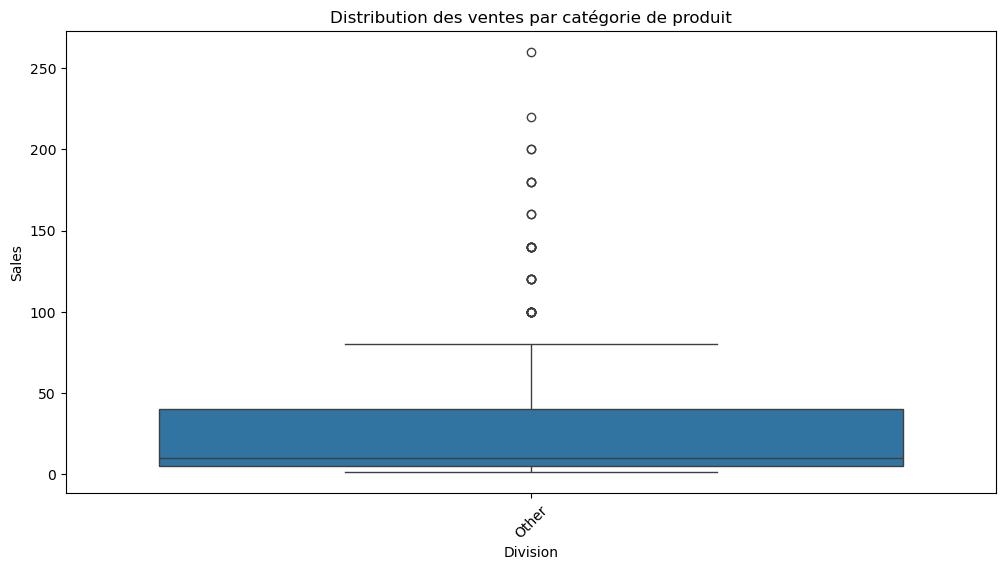

In [ ]:
# Boxplot comparatif par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_su[df_su['Division'] == 'Other'], x='Division', y='Sales')
plt.xticks(rotation=45)
plt.title('Distribution des ventes par catégorie de produit')
plt.show()

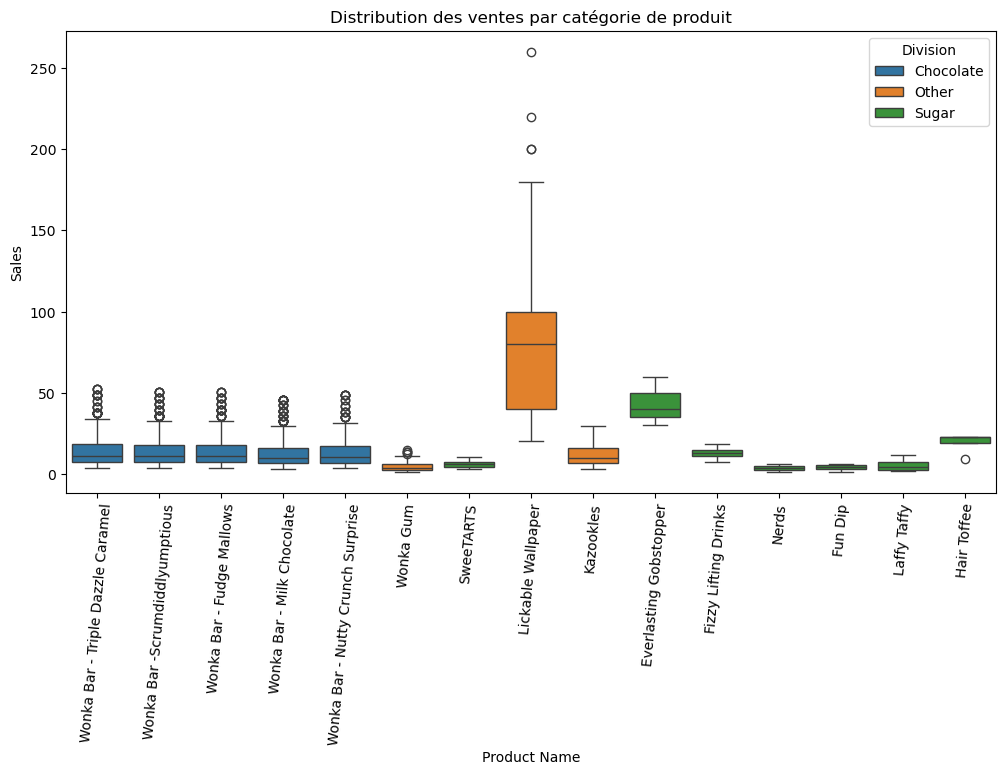

In [ ]:
# Boxplot comparatif par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_su, x='Product Name', y='Sales' , hue='Division')
plt.xticks(rotation=85)
plt.title('Distribution des ventes par catégorie de produit')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Wonka Bar - Triple Dazzle Caramel'),
  Text(1, 0, 'Wonka Bar -Scrumdiddlyumptious'),
  Text(2, 0, 'Wonka Bar - Fudge Mallows'),
  Text(3, 0, 'Wonka Bar - Milk Chocolate'),
  Text(4, 0, 'Wonka Bar - Nutty Crunch Surprise'),
  Text(5, 0, 'Wonka Gum'),
  Text(6, 0, 'SweeTARTS'),
  Text(7, 0, 'Lickable Wallpaper'),
  Text(8, 0, 'Kazookles'),
  Text(9, 0, 'Everlasting Gobstopper'),
  Text(10, 0, 'Fizzy Lifting Drinks'),
  Text(11, 0, 'Nerds'),
  Text(12, 0, 'Fun Dip'),
  Text(13, 0, 'Laffy Taffy'),
  Text(14, 0, 'Hair Toffee')])

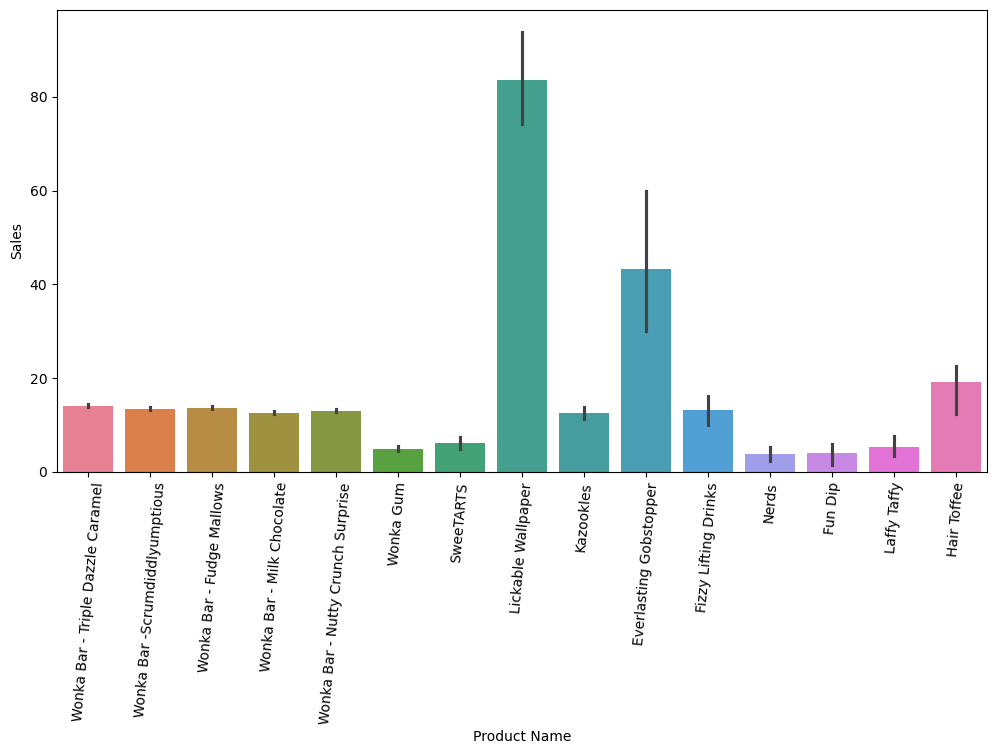

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Product Name' , y='Sales' , data=df_su , hue='Product Name'
)
plt.xticks(rotation=85) 

In [ ]:
wallpaper = df_su[df_su['Product Name'] == 'Lickable Wallpaper' ][[ 'Division','Product Name',
       'Sales', 'Units', 'Gross Profit' ,'state_id', 'state_name', 'zcta', 'parent_zcta', 'population','density']]

<AxesSubplot: xlabel='Division', ylabel='Sales'>

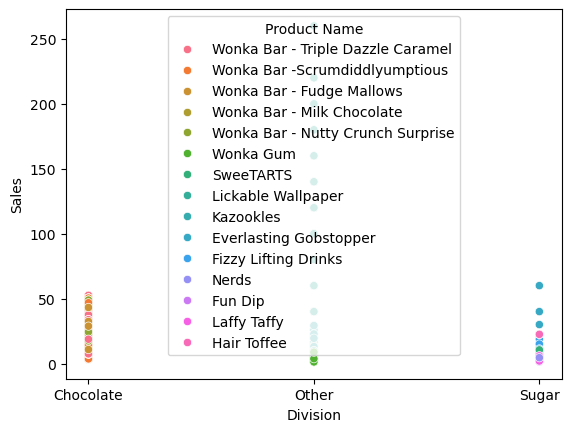

In [ ]:
sns.scatterplot(
    df_su , x='Division' , y='Sales' , hue='Product Name'
)

<h2 style='color: blue;'>Analyse des regles d'association<h2/>

In [68]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
df_su['Product ID'].unique()

array(['CHO-TRI-54000', 'CHO-SCR-58000', 'CHO-FUD-51000', 'CHO-MIL-31000',
       'CHO-NUT-13000', 'OTH-GUM-21000', 'SUG-SWE-91000', 'OTH-LIC-15000',
       'OTH-KAZ-38000', 'SUG-EVE-47000', 'OTH-FIZ-56000', 'SUG-NER-92000',
       'SUG-FUN-75000', 'SUG-LAF-25000', 'SUG-HAI-55000'], dtype=object)

In [ ]:
# Transformation des données pour l’analyse d’association
transactions = df_su.groupby('Customer ID')['Product ID'].apply(list)

Le paramètre min_support est une valeur seuil qui représente la fréquence minimale qu'un itemset (ensemble d'éléments) doit avoir pour être considéré dans l'analyse. Il est essentiel car il permet de filtrer les combinaisons de produits qui apparaissent rarement ensemble, pour se concentrer sur les associations les plus significatives.

In [ ]:
# Encoder les transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Utiliser Apriori pour trouver les itemsets fréquents
frequent_itemsets = apriori(transaction_df, min_support=0.03, use_colnames=True)


print("Itemsets fréquents:")
print(frequent_itemsets)


Itemsets fréquents:
     support                                       itemsets
0   0.297383                                (CHO-FUD-51000)
1   0.345956                                (CHO-MIL-31000)
2   0.300952                                (CHO-NUT-13000)
3   0.331879                                (CHO-SCR-58000)
4   0.328311                                (CHO-TRI-54000)
5   0.091594                 (CHO-MIL-31000, CHO-FUD-51000)
6   0.078509                 (CHO-NUT-13000, CHO-FUD-51000)
7   0.081483                 (CHO-SCR-58000, CHO-FUD-51000)
8   0.080690                 (CHO-TRI-54000, CHO-FUD-51000)
9   0.089413                 (CHO-MIL-31000, CHO-NUT-13000)
10  0.095163                 (CHO-MIL-31000, CHO-SCR-58000)
11  0.093577                 (CHO-MIL-31000, CHO-TRI-54000)
12  0.087431                 (CHO-SCR-58000, CHO-NUT-13000)
13  0.085052                 (CHO-NUT-13000, CHO-TRI-54000)
14  0.097343                 (CHO-SCR-58000, CHO-TRI-54000)
15  0.032316  (CHO-M

In [ ]:
# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Règles d'association:")
rules.head(4)

Règles d'association:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(CHO-MIL-31000, CHO-SCR-58000)",(CHO-FUD-51000),0.095163,0.297383,0.032316,0.339583,1.141906,0.004016,1.063900,0.137341
1,"(CHO-MIL-31000, CHO-FUD-51000)",(CHO-SCR-58000),0.091594,0.331879,0.032316,0.352814,1.063078,0.001917,1.032347,0.065318
2,"(CHO-SCR-58000, CHO-FUD-51000)",(CHO-MIL-31000),0.081483,0.345956,0.032316,0.396594,1.146372,0.004126,1.083920,0.139009
3,(CHO-MIL-31000),"(CHO-SCR-58000, CHO-FUD-51000)",0.345956,0.081483,0.032316,0.093410,1.146372,0.004126,1.013156,0.195220


"""
- antecedents	Les produits de départ dans la règle d’association (par exemple, {A}).
- consequents	Les produits associés aux produits de départ (par exemple, {D}).
- antecedent support	La fréquence d'apparition de l'antecedent dans toutes les transactions.
- consequent support	La fréquence d'apparition du consequent dans toutes les transactions.
- support	La fréquence d'apparition conjointe de l'antecedent et du consequent dans toutes les transactions.
- confidence	La probabilité qu’un client qui achète l’antecedent achète également le consequent. Elle est - calculée comme support(antecedent + consequent) / support(antecedent).
- lift	Mesure la force de l'association. Un lift > 1 indique que l'achat de l'antecedent augmente la - - - - - probabilité d'achat du consequent, comparé à une situation où les deux seraient indépendants.
- leverage	Mesure la différence entre le support de la combinaison antecedent + consequent et le support - 
- attendu si ces deux produits étaient indépendants.
- conviction	Mesure la dépendance des règles. Une conviction élevée indique une plus forte corrélation positive entre les produits.
- zhangs_metric	Mesure l'intérêt de la règle, surtout utile pour identifier les règles intéressantes même si elles sont peu fréquentes.
"""

In [ ]:
# Filtrer les règles où le produit "A" est acheté avec un autre produit
rules_for_wall = rules[rules['antecedents'].apply(lambda x: 'CHO-SCR-58000' in x)]
rules_for_wall.to_csv('wonka-bar-milk-chocolate.csv')


In [ ]:
rules_for_wall[ rules_for_wall['antecedent support'] > 0.3 ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(CHO-SCR-58000),"(CHO-MIL-31000, CHO-FUD-51000)",0.331879,0.091594,0.032316,0.097372,1.063078,0.001917,1.006401,0.088810
15,(CHO-SCR-58000),"(CHO-NUT-13000, CHO-FUD-51000)",0.331879,0.078509,0.030730,0.092593,1.179386,0.004674,1.015521,0.227656
22,(CHO-SCR-58000),"(CHO-FUD-51000, CHO-TRI-54000)",0.331879,0.080690,0.030531,0.091995,1.140108,0.003752,1.012451,0.183934
28,(CHO-SCR-58000),"(CHO-MIL-31000, CHO-NUT-13000)",0.331879,0.089413,0.035686,0.107527,1.202584,0.006012,1.020296,0.252136
40,(CHO-SCR-58000),"(CHO-MIL-31000, CHO-TRI-54000)",0.331879,0.093577,0.034893,0.105137,1.123545,0.003837,1.012919,0.164581
45,(CHO-SCR-58000),"(CHO-NUT-13000, CHO-TRI-54000)",0.331879,0.085052,0.032316,0.097372,1.144854,0.004089,1.013649,0.189376


# Probl ́ematique 2: Analyse des Marges par Produit
Probl`eme : Certains produits ont une marge b ́en ́eficiaire inf ́erieure, ce qui impacte la rentabilit ́e globale.
Objectif : Identifier les produits les plus profitables et ajuster la strat ́egie pour les produits moins
rentables

Produits avec des marges faibles mais des ventes élevées : stratégies d’optimisation (par exemple, réduire les coûts ou augmenter les prix).

Produits avec des ventes faibles et des marges faibles : envisager une élimination ou un repositionnement.

Synthétiser les produits les plus et les moins rentables :

Lister les produits qui nécessitent une attention immédiate.
Recommander des ajustements de stratégie (modification des prix, réduction des coûts, ou élimination).
Analyse saisonnière pour ajuster les promotions :

Identifier les périodes de pointe pour les produits moins rentables et suggérer des stratégies promotionnelles.

In [75]:
df_cp

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [82]:
other = df_selected[(df_selected['Product ID'] == 'OTH-KAZ-38000') | 
                    (df_selected['Product ID'] == 'OTH-GUM-21000') | 
                    (df_selected['Product ID'] == 'OTH-LIC-15000') |
                    (df_selected['Product ID'] == 'OTH-FIZ-56000') 
                ]


In [83]:
other

,Customer ID,State/Province,Postal Code,lat,lng,population,density,Product ID,Factory,Latitude,Longitude,Country/Region,Units,Unit Cost,distances
61,118213,Indiana,46142,39.62029,-86.17640,34676.0,896.2,OTH-GUM-21000,Secret Factory,41.446333,-90.565487,United States,3,0.6,422.787744
195,143749,Massachusetts,02038,42.08622,-71.41126,32777.0,475.1,OTH-LIC-15000,Secret Factory,41.446333,-90.565487,United States,1,10.0,1586.856845
215,162201,Florida,33710,27.78980,-82.73069,34102.0,1651.5,OTH-GUM-21000,Secret Factory,41.446333,-90.565487,United States,10,0.6,1677.433702
223,111948,Michigan,48234,42.43120,-83.03952,32402.0,1600.7,OTH-GUM-21000,Secret Factory,41.446333,-90.565487,United States,7,0.6,631.834977
226,132976,Pennsylvania,19140,40.01224,-75.14512,53996.0,6613.6,OTH-LIC-15000,Secret Factory,41.446333,-90.565487,United States,2,10.0,1307.352215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,102127,New York,10035,40.79538,-73.92965,38595.0,10608.7,OTH-GUM-21000,Secret Factory,41.446333,-90.565487,United States,3,0.6,1393.244986
8416,159100,Tennessee,38401,35.62955,-87.02097,65393.0,85.1,OTH-GUM-21000,Secret Factory,41.446333,-90.565487,United States,7,0.6,716.337210
8443,128265,New York,10011,40.74173,-74.00037,50772.0,30272.6,OTH-LIC-15000,Secret Factory,41.446333,-90.565487,United States,3,10.0,1388.243566
8445,116715,California,94122,37.76113,-122.48433,59453.0,7047.4,OTH-LIC-15000,Secret Factory,41.446333,-90.565487,United States,2,10.0,2749.215601


In [87]:
# Créer la carte centrée sur la région
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)

for fact in other['Factory'].unique().tolist() : 

    companyFeatureGroup = folium.FeatureGroup(name = fact , show=False)
    marker_cluster = MarkerCluster(name=f'{fact} - Clients', show=False)


    df = other[ other['Factory'] == fact ]

    factories = df[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
    # factories
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Factory - {row['Factory']}"
        ).add_to(companyFeatureGroup)

    # all row
    for _, row in df.iterrows(): 
        folium.Marker(
            location=[row["lat"], row["lng"]],
            icon=folium.Icon(color="blue", icon="user", prefix="fa"),
            popup=f"Client - {row['Factory']}"
        ).add_to(marker_cluster)


        folium.PolyLine(
            locations=[
                [latitude , longitude] ,  
                [row["lat"], row["lng"]]
            ],
            color='black' ,
            weight=0.5,
            opacity=0.5,
        ).add_to(companyFeatureGroup)
    
    companyFeatureGroup.add_to(m)
    marker_cluster.add_to(m)

# Ajouter le contrôle des calques
folium.LayerControl().add_to(m)
m.save("other.html") ;

In [126]:
df_cp

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [ ]:
other_fact = df_selected[((df_selected['Factory'] == 'The Other Factory')) & (  df_selected['Product ID']== 'SUG-HAI-55000'  ) ]

In [132]:
# 
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=6)

for fact in other_fact['Factory'].unique().tolist() : 

    companyFeatureGroup = folium.FeatureGroup(name = fact , show=False)
    marker_cluster = MarkerCluster(name=f'{fact} - Clients', show=False)


    df = other_fact[ other_fact['Factory'] == fact ]

    factories = df[['Factory', 'Latitude', 'Longitude']].drop_duplicates()
    for _ ,row in factories.iterrows(): 
        latitude = row['Latitude']
        longitude = row['Longitude']
        folium.Marker(
            location=[latitude , longitude ] , 
            icon=folium.Icon(color='red', icon="industry", prefix="fa"),
            popup=f"Factory - {row['Factory']}"
        ).add_to(companyFeatureGroup)

    # all row
    for _, row in df.iterrows(): 
        folium.Marker(
            location=[row["lat"], row["lng"]],
            icon=folium.Icon(color="blue", icon="user", prefix="fa"),
            popup=f"Client - {row['Factory']}"
        ).add_to(marker_cluster)


        folium.PolyLine(
            locations=[
                [latitude , longitude] ,  
                [row["lat"], row["lng"]]
            ],
            color='black' ,
            weight=0.5,
            opacity=0.5,
        ).add_to(companyFeatureGroup)
    
    companyFeatureGroup.add_to(m)
    marker_cluster.add_to(m)

# Ajouter le contrôle des calques
folium.LayerControl().add_to(m)

m.save("other_fact.html") ;

In [134]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Supposons que votre DataFrame est déjà chargé dans la variable other_fact
# Exemple pour rappel :
# other_fact = pd.DataFrame({
#     "Customer ID": [...],
#     "State/Province": [...],
#     "Postal Code": [...],
#     "lat": [...],
#     "lng": [...],
#     ...
# })

# Calcul de la position optimale (pondérée par la Units)
weighted_lat = sum(other_fact['lat'] * other_fact['Units']) / other_fact['Units'].sum()
weighted_lng = sum(other_fact['lng'] * other_fact['Units']) / other_fact['Units'].sum()

print(f"Position optimale: Latitude = {weighted_lat}, Longitude = {weighted_lng}")

# Création de la carte interactive
center_lat = other_fact['lat'].mean()
center_lng = other_fact['lng'].mean()
map_ = folium.Map(location=[center_lat, center_lng], zoom_start=6)

# Ajouter les positions des clients
marker_cluster = MarkerCluster().add_to(map_)
for _, row in other_fact.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Client ID: {row['Customer ID']}<br>Units: {row['Units']}",
        icon=folium.Icon(color='blue', icon='info-sign'),
    ).add_to(marker_cluster)

# Ajouter la position actuelle de l'usine
folium.Marker(
    location=[other_fact['Latitude'].iloc[0], other_fact['Longitude'].iloc[0]],
    popup="Usine actuelle: Sugar Shack",
    icon=folium.Icon(color='red', icon='home'),
).add_to(map_)

# Ajouter la position optimale
folium.Marker(
    location=[weighted_lat, weighted_lng],
    popup="Position optimale (calculée)",
    icon=folium.Icon(color='green', icon='star'),
).add_to(map_)

# Exporter la carte vers un fichier HTML
map_.save("other_fact_location_optimization.html")
print("Carte générée et sauvegardée sous 'other_fact_location_optimization.html'.")


Position optimale: Latitude = 36.028358235294114, Longitude = -98.96589529411764
Carte générée et sauvegardée sous 'other_fact_location_optimization.html'.


In [ ]:
other_fact ; 

In [135]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic

# Supposons que votre DataFrame other_fact est déjà chargé
# Exemple : other_fact contient 'lat', 'lng', 'Latitude', 'Longitude', 'population'

# 1. Calcul des distances entre les clients et l'usine actuelle
other_fact['distance_to_factory'] = other_fact.apply(
    lambda row: geodesic((row['lat'], row['lng']), (row['Latitude'], row['Longitude'])).km,
    axis=1
)


# 2. Calcul de la position optimale pondérée par la population
weighted_lat = sum(other_fact['lat'] * other_fact['Units']) / other_fact['Units'].sum()
weighted_lng = sum(other_fact['lng'] * other_fact['Units']) / other_fact['Units'].sum()

# 3. Calcul des distances entre les clients et la position optimale
other_fact['distance_to_optimal'] = other_fact.apply(
    lambda row: geodesic((row['lat'], row['lng']), (weighted_lat, weighted_lng)).km,
    axis=1
)

# 4. Création de la carte avec Folium
center_lat = other_fact['lat'].mean()
center_lng = other_fact['lng'].mean()
map_ = folium.Map(location=[center_lat, center_lng], zoom_start=6)

# Ajouter les positions des clients (bleu)
marker_cluster = MarkerCluster(name="Clients - Usine Actuelle").add_to(map_)
for _, row in other_fact.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Client ID: {row['Customer ID']}<br>Distance actuelle: {row['distance_to_factory']:.2f} km",
        icon=folium.Icon(color='blue', icon='info-sign'),
    ).add_to(marker_cluster)

# Ajouter les distances vers la position optimale (vert)
optimal_cluster = MarkerCluster(name="Clients - Position Optimale").add_to(map_)
for _, row in other_fact.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Client ID: {row['Customer ID']}<br>Distance optimale: {row['distance_to_optimal']:.2f} km",
        icon=folium.Icon(color='green', icon='info-sign'),
    ).add_to(optimal_cluster)

# Ajouter l'usine actuelle (rouge)
folium.Marker(
    location=[other_fact['Latitude'].iloc[0], other_fact['Longitude'].iloc[0]],
    popup="Usine actuelle: Sugar Shack",
    icon=folium.Icon(color='red', icon='home'),
).add_to(map_)

# Ajouter la position optimale (étoile verte)
folium.Marker(
    location=[weighted_lat, weighted_lng],
    popup="Position optimale (calculée)",
    icon=folium.Icon(color='green', icon='star'),
).add_to(map_)

# Activer les groupes sur la carte
folium.LayerControl().add_to(map_)

# 5. Exporter la carte en HTML
map_.save("other_fact_distances_comparison.html")
print("Carte générée et sauvegardée sous 'factory_distances_comparison.html'.")


C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\712335857.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_fact['distance_to_factory'] = other_fact.apply(
C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\712335857.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_fact['distance_to_optimal'] = other_fact.apply(


Carte générée et sauvegardée sous 'factory_distances_comparison.html'.


In [136]:
other_fact['distance_to_factory'] ; 
other_fact['factory_distance_group'] = pd.cut(
    other_fact['distance_to_factory'], 
    bins=[-float('inf'), 80, 380, float('inf')], 
    labels=["<80", "80-380", ">380"]
)


C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\3699778174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_fact['factory_distance_group'] = pd.cut(


In [137]:
other_fact['factory_distance_group'].value_counts()


factory_distance_group
>380      4
<80       0
80-380    0
Name: count, dtype: int64

In [138]:
other_fact['distance_to_optimal'] ; 
other_fact['distance_to_optimal_group'] = pd.cut(
    other_fact['distance_to_optimal'], 
    bins=[-float('inf'), 80, 380, float('inf')], 
    labels=["<80", "80-380", ">380"]
)


C:\Users\stephn\AppData\Local\Temp\ipykernel_14496\498590279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_fact['distance_to_optimal_group'] = pd.cut(


In [123]:
other_fact['distance_to_optimal_group'].value_counts()

distance_to_optimal_group
>380      95
80-380     3
<80        0
Name: count, dtype: int64